In [1]:
import os, sys
parent = os.path.abspath('../..')

if not parent in sys.path: sys.path.append(parent)

import numpy as np
import matplotlib.pyplot as plt

from src.crowd_bt.models import *
from src.crowd_bt.judge import *
from src.utilities import vote, top_10

plt.style.use('_mpl-gallery')

In [2]:
N = 500
budget = range(1000, 10000, 1000)
ranking = list(np.random.permutation(N))

In [5]:
def crowd_bt(ranking, budget):
    annotators = [Annotator() for _ in range(3 * N)]
    items = [Item(i) for i in range(N)]

    while budget > 0:
        annotator: Annotator = np.random.choice(annotators)
        maybe_init_annotator(annotator, items)

        annotator.update_next(choose_next(annotator, items))
        prev = annotator.prev
        next = annotator.next

        _, winner_id = vote((prev.id, next.id), ranking, p=1)
        next_wins = winner_id == next.id
        perform_vote(annotator, next_wins)

        budget -= 1

    return list(map(lambda i: i.id, sorted(items, key=lambda i: i.mu)))

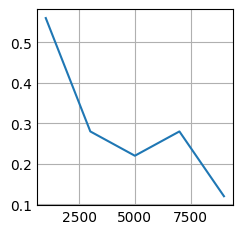

In [7]:
budget = range(1000, 10000, 2000)
L = [top_10(ranking, crowd_bt(ranking, b)) for b in budget]

plt.plot(list(budget), L)
plt.show()

In [8]:
L

[0.56, 0.28, 0.21999999999999997, 0.28, 0.12]